# Unsupervised Learning: clustering

notebook adapted from: https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb

See Machine Learning avec Scikit-Learn, Mise en oeuvre et cas concrets, by Aurélien Géron

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Using clustering for image segmentation


![Iris](ladybug.png)

In [54]:
from matplotlib.image import imread
image = imread(os.path.join("ladybug.png"))
image.shape


(533, 800, 3)

In [64]:
from sklearn.cluster import KMeans
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [56]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [63]:
kmeans.cluster_centers_.shape

(2, 3)

Saving figure image_segmentation_diagram


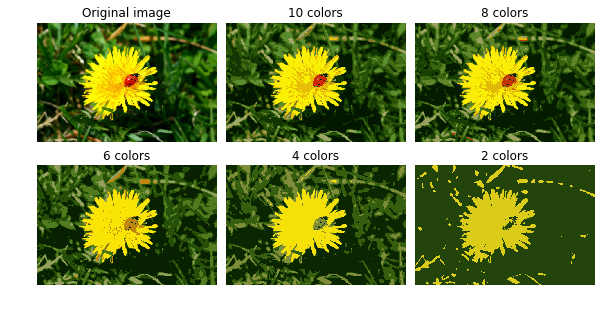

In [57]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show()

In [58]:
from sklearn.mixture import GaussianMixture

In [77]:
segmented_imgs = []
n_clusters = 2
gauss = GaussianMixture(n_components=n_clusters, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[gauss.predict(X)]
segmented_imgs.append(segmented_img.reshape(image.shape))

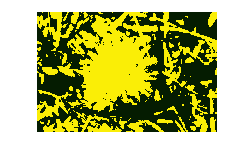

In [78]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(segmented_imgs[0])
plt.title("")
plt.axis('off')


plt.show()

In [84]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(4, 16,4)]

In [85]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

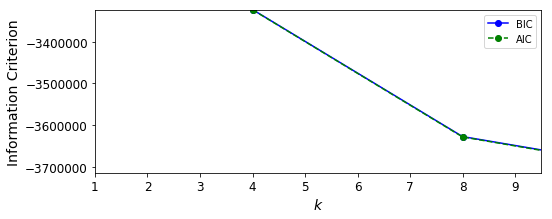

In [86]:
plt.figure(figsize=(8, 3))
plt.plot(range(4, 16,4), bics, "bo-", label="BIC")
plt.plot(range(4, 16,4), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
plt.show()